# Notebook de Aula - Modulo 16

- Method chaining (encadeamento de métodos)
	- `.assign()`
	- `.pipe()`
- `for` vs List comprehension
- Usando `.apply()`
- `.apply(axis = 0)` 
- Barra de progresso usando `tqdm`
- Pandas Profiling para exploração dos dados e para garantir a qualidade dos dados
- Mostrar o dataframe usando o `style`
- Copiar e colar no Excel `.to_clipboard()`
- Funções de janela móvel (*window functions*)
- Fechamento 2o projeto

## 0. Import - Tabela NBA janeiro 2021


In [109]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

import os

In [2]:
path = 'input/nba_2021.csv'
os.makedirs('./input', exist_ok=True)

resultados = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2021_games-january.html")[0]
resultados.to_csv(path)
df = resultados.copy()
resultados.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes
0,"Fri, Jan 1, 2021",7:00p,Memphis Grizzlies,108,Charlotte Hornets,93,Box Score,NaN,0,Spectrum Center,NaN
1,"Fri, Jan 1, 2021",7:00p,Miami Heat,83,Dallas Mavericks,93,Box Score,NaN,0,American Airlines Center,NaN
2,"Fri, Jan 1, 2021",7:00p,Boston Celtics,93,Detroit Pistons,96,Box Score,NaN,0,Little Caesars Arena,NaN
3,"Fri, Jan 1, 2021",7:30p,Atlanta Hawks,114,Brooklyn Nets,96,Box Score,NaN,0,Barclays Center,NaN
4,"Fri, Jan 1, 2021",8:00p,Chicago Bulls,96,Milwaukee Bucks,126,Box Score,NaN,0,Fiserv Forum,NaN


In [3]:
colunas = {
    'Date': 'data',
    'Start (ET)': 'horario',
    'Visitor/Neutral': 'time_visitante',
    'PTS': 'pts_visit',
    'Home/Neutral': 'time_casa',
    'PTS.1': 'pts_casa',
    'Unnamed: 6': 'a',
    'Unnamed: 7': 'b',
    'Attend.': 'publico',
    'Notes': 'anot'
}
result_renomeado = resultados.rename(columns=colunas)

In [4]:
result_renomeado['data'] = pd.to_datetime(result_renomeado.data)

In [5]:
result_renomeado_data = result_renomeado.set_index('data')

In [6]:
result_renomeado_data_cols = result_renomeado_data.drop(['horario','a','b','publico','anot'], axis=1)

In [7]:
result_renomeado_data_cols['total'] = (result_renomeado_data_cols['pts_visit']
                                       + result_renomeado_data_cols['pts_casa'])

In [8]:
def det_vencedor(df):
    if df['pts_visit'] < df['pts_casa']:
        df['ganhador'] = 'casa'
    else:
        df['ganhador'] = 'visitante'
    return df

In [9]:
result_renomeado_data_cols = result_renomeado_data_cols.apply(det_vencedor, axis=1)

In [10]:
result_renomeado_data_cols.ganhador.value_counts(normalize=True)

casa         0.531532
visitante    0.468468
Name: ganhador, dtype: float64

In [12]:
resultados = result_renomeado_data_cols

## 1. Method chaining (encadeamento de métodos)


### Assign
`.assign()` faz a mesma coisa que o `=`, ou seja, 

`df['data'] = pd.to_datetime(df['data'])` é a mesma coisa que `df.assign(data = lambda x: pd.to_datetime(x.data))`

In [13]:
resultados['total'] = resultados['pts_visit']+resultados['pts_casa']
resultados

,time_visitante,pts_visit,time_casa,pts_casa,Arena,total,ganhador
data,,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,Spectrum Center,201,visitante
2021-01-01,Miami Heat,83,Dallas Mavericks,93,American Airlines Center,176,casa
2021-01-01,Boston Celtics,93,Detroit Pistons,96,Little Caesars Arena,189,casa
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96,Barclays Center,210,visitante
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126,Fiserv Forum,222,casa
...,...,...,...,...,...,...,...
2021-01-31,Utah Jazz,117,Denver Nuggets,128,Ball Arena,245,casa
2021-01-31,Philadelphia 76ers,119,Indiana Pacers,110,Bankers Life Fieldhouse,229,visitante
2021-01-31,Orlando Magic,102,Toronto Raptors,115,Amalie Arena,217,casa


In [14]:
resultados.assign(total_2 = lambda x: x['pts_visit'] + x['pts_casa'])

,time_visitante,pts_visit,time_casa,pts_casa,Arena,total,ganhador,total_2
data,,,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,Spectrum Center,201,visitante,201
2021-01-01,Miami Heat,83,Dallas Mavericks,93,American Airlines Center,176,casa,176
2021-01-01,Boston Celtics,93,Detroit Pistons,96,Little Caesars Arena,189,casa,189
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96,Barclays Center,210,visitante,210
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126,Fiserv Forum,222,casa,222
...,...,...,...,...,...,...,...,...
2021-01-31,Utah Jazz,117,Denver Nuggets,128,Ball Arena,245,casa,245
2021-01-31,Philadelphia 76ers,119,Indiana Pacers,110,Bankers Life Fieldhouse,229,visitante,229
2021-01-31,Orlando Magic,102,Toronto Raptors,115,Amalie Arena,217,casa,217


### Pipe
Dá pra fazer bastante coisa com as funções internas do pandas/python, mas as vezes a gente precisa usar alguma função criada por nós mesmos, e para isso que serve o `.pipe()` e tem a funcionalidade parecida com o `%>%` (leia-se pipe) do R.
Onde o resultado da função a esquerda entra como primeiro parâmetro na função da direita.


#### Em R
``` R

sqrt(sum(x))

x %>% sum() %>% sqrt()

```


**Receita de bolo sem pipe. Tente entender o que é preciso fazer.**

``` R

esfrie(
  asse(
    coloque(
      bata(
        acrescente(
          recipiente(
            rep("farinha", 2), 
            "água", 
            "fermento", 
            "leite", 
            "óleo"
          ), 
          "farinha", 
          ate = "macio"
        ), 
        duracao = "3min"
      ), 
      lugar = "forma", 
      tipo = "grande", 
      untada = TRUE
    ), 
    duracao = "50min"
  ), 
  lugar = "geladeira", 
  duracao = "20min"
)

```

Veja como o código acima pode ser reescrito utilizando-se o pipe. Agora realmente se parece com uma receita de bolo.


``` R
recipiente(rep("farinha", 2), "água", "fermento", "leite", "óleo") %>%
  acrescente("farinha", ate = "macio") %>%
  bata(duracao = "3min") %>%
  coloque(lugar = "forma", tipo = "grande", untada = TRUE) %>%
  asse(duracao = "50min") %>%
  esfrie(lugar = "geladeira", duracao = "20min")

```

trecho extraído do livro [curso-r](https://livro.curso-r.com/6-1-o-operador-pipe.html)

In [15]:
resultados.head(1)

,time_visitante,pts_visit,time_casa,pts_casa,Arena,total,ganhador
data,,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,Spectrum Center,201,visitante


In [16]:
resultados = resultados.drop('ganhador', axis=1)
resultados.head(1)

,time_visitante,pts_visit,time_casa,pts_casa,Arena,total
data,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,Spectrum Center,201


In [17]:
resultados = resultados.apply(det_vencedor, axis=1)
resultados

,time_visitante,pts_visit,time_casa,pts_casa,Arena,total,ganhador
data,,,,,,,
2021-01-01,Memphis Grizzlies,108,Charlotte Hornets,93,Spectrum Center,201,visitante
2021-01-01,Miami Heat,83,Dallas Mavericks,93,American Airlines Center,176,casa
2021-01-01,Boston Celtics,93,Detroit Pistons,96,Little Caesars Arena,189,casa
2021-01-01,Atlanta Hawks,114,Brooklyn Nets,96,Barclays Center,210,visitante
2021-01-01,Chicago Bulls,96,Milwaukee Bucks,126,Fiserv Forum,222,casa
...,...,...,...,...,...,...,...
2021-01-31,Utah Jazz,117,Denver Nuggets,128,Ball Arena,245,casa
2021-01-31,Philadelphia 76ers,119,Indiana Pacers,110,Bankers Life Fieldhouse,229,visitante
2021-01-31,Orlando Magic,102,Toronto Raptors,115,Amalie Arena,217,casa


In [28]:
def det_vencedor(df):
    if (df['pts_visit'] < df['pts_casa']):
        df['ganhador'] = 'casa'
    else:
        df['ganhador'] = 'visitante'
    return df

df = pd.read_csv('input/nba_2021.csv')
df.head()
df = (df.rename(columns=colunas)
    .assign(data = lambda x: pd.to_datetime(x.data))
    .set_index('data')
    .drop(['horario','a','b','publico','anot'], axis=1)
    .assign(total = lambda x: x['pts_visit']+x['pts_casa'])
    .apply(det_vencedor, axis=1)
)
df.head()

,Unnamed: 0,time_visitante,pts_visit,time_casa,pts_casa,Arena,total,ganhador
data,,,,,,,,
2021-01-01,0,Memphis Grizzlies,108,Charlotte Hornets,93,Spectrum Center,201,visitante
2021-01-01,1,Miami Heat,83,Dallas Mavericks,93,American Airlines Center,176,casa
2021-01-01,2,Boston Celtics,93,Detroit Pistons,96,Little Caesars Arena,189,casa
2021-01-01,3,Atlanta Hawks,114,Brooklyn Nets,96,Barclays Center,210,visitante
2021-01-01,4,Chicago Bulls,96,Milwaukee Bucks,126,Fiserv Forum,222,casa


## 2. `for` vs List comprehension

In [31]:
df_aux = pd.DataFrame({'A': np.arange(10, 101, 10), 
                       'B': np.arange(1, 11, 1)})

In [32]:
df_aux['A'] + df_aux['B']

0     11
1     22
2     33
3     44
4     55
5     66
6     77
7     88
8     99
9    110
dtype: int64

In [33]:
df_aux

,A,B
0,10,1
1,20,2
2,30,3
3,40,4
4,50,5
5,60,6
6,70,7
7,80,8
8,90,9
9,100,10


### Usando `for`

In [408]:
for a in df_aux['A']:
    print(a)

10
20
30
40
50
60
70
80
90
100


### Usando *list comprehension*
```python
[expr for item in lista]
```


In [34]:
[print(a) for a in df_aux['A']]

10
20
30
40
50
60
70
80
90
100


[None, None, None, None, None, None, None, None, None, None]

In [35]:
list(zip(df_aux['A'],df_aux['B']))

[(10, 1),
 (20, 2),
 (30, 3),
 (40, 4),
 (50, 5),
 (60, 6),
 (70, 7),
 (80, 8),
 (90, 9),
 (100, 10)]

### Usando `for` e `zip`

In [409]:
for a,b in zip(df_aux['A'],df_aux['B']):
    print(a,b)

10 1
20 2
30 3
40 4
50 5
60 6
70 7
80 8
90 9
100 10


### Usando *list comprehension* e `zip`
```python
[expr for item in lista]
```


In [36]:
[print(a,b) for a,b in zip(df_aux['A'],df_aux['B'])]

10 1
20 2
30 3
40 4
50 5
60 6
70 7
80 8
90 9
100 10


[None, None, None, None, None, None, None, None, None, None]

### Usando `for` e `zip` e `if`

In [37]:
for a,b in zip(df_aux['A'],df_aux['B']):
    if b % 2 == 0:
        print(a+b)

22
44
66
88
110


### Usando *list comprehension* e `zip` e `if`
```python
[expr for item in lista if cond]
```


In [38]:
[a + b for a,b in zip(df_aux['A'],df_aux['B']) if b % 2 == 0]

[22, 44, 66, 88, 110]

### Usando `for` e `zip` e `if-else`

In [39]:
for a,b in zip(df_aux['A'],df_aux['B']):
    if b % 2 == 0:
        print(a+b)
    else:
        print(0)

0
22
0
44
0
66
0
88
0
110


### Usando *list comprehension* e `zip` e `if-else`
```python
[expr1 if cond else expr2 for item in lista ]
```


In [40]:
[a + b if b % 2 == 0 else 0 for a,b in zip(df_aux['A'],df_aux['B'])]

[0, 22, 0, 44, 0, 66, 0, 88, 0, 110]

In [41]:
df_aux['soma'] = [a + b if b % 2 == 0 else 0 for a,b in zip(df_aux['A'],df_aux['B'])]

In [42]:
df_aux

,A,B,soma
0,10,1,0
1,20,2,22
2,30,3,0
3,40,4,44
4,50,5,0
5,60,6,66
6,70,7,0
7,80,8,88
8,90,9,0
9,100,10,110


In [43]:
df_aux.drop('soma', axis=1, inplace=True)

## 3. Usando `apply`

In [44]:
df_aux = pd.DataFrame({'A': np.arange(10, 101, 10), 
                       'B': np.arange(1, 11, 1)})

In [45]:
df_aux['A'] + df_aux['B']

0     11
1     22
2     33
3     44
4     55
5     66
6     77
7     88
8     99
9    110
dtype: int64

In [46]:
df_aux

,A,B
0,10,1
1,20,2
2,30,3
3,40,4
4,50,5
5,60,6
6,70,7
7,80,8
8,90,9
9,100,10


### Usando `.apply()` com `lambda` (função anônima)

In [47]:
A = print(1)

1


In [48]:
print(A)

None


In [49]:
df_aux.apply(lambda x: print(x), axis=0)

0     10
1     20
2     30
3     40
4     50
5     60
6     70
7     80
8     90
9    100
Name: A, dtype: int64
0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: B, dtype: int64


A    None
B    None
dtype: object

In [50]:
df_aux.apply(lambda x: print(x), axis=1)

A    10
B     1
Name: 0, dtype: int64
A    20
B     2
Name: 1, dtype: int64
A    30
B     3
Name: 2, dtype: int64
A    40
B     4
Name: 3, dtype: int64
A    50
B     5
Name: 4, dtype: int64
A    60
B     6
Name: 5, dtype: int64
A    70
B     7
Name: 6, dtype: int64
A    80
B     8
Name: 7, dtype: int64
A    90
B     9
Name: 8, dtype: int64
A    100
B     10
Name: 9, dtype: int64


0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
dtype: object

In [51]:
df_aux.apply(lambda x: x['A'] + x['B'], axis=1)

0     11
1     22
2     33
3     44
4     55
5     66
6     77
7     88
8     99
9    110
dtype: int64

In [52]:
df_aux['B'] % 2 == 0

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8    False
9     True
Name: B, dtype: bool

### Usando `.apply()` com `lambda` e `if-else`

In [53]:
df_aux.apply(lambda x: x['A'] + x['B'] if x['B'] % 2 == 0 else 0, axis=1)

0      0
1     22
2      0
3     44
4      0
5     66
6      0
7     88
8      0
9    110
dtype: int64

### Usando `apply` com uma função definida por nós (*udf - user defined function*)

In [54]:
def soma_se_par(df):
    if (df['B'] % 2 == 0):
        return df['B'] + df['A']
    else:
        return 0

In [55]:
df_aux.apply(soma_se_par, axis=1)

0      0
1     22
2      0
3     44
4      0
5     66
6      0
7     88
8      0
9    110
dtype: int64

### Comparando a performance das *lists comprehension* com `.apply()`

In [56]:
%timeit [a + b if b % 2 == 0 else 0 for a,b in zip(df_aux['A'],df_aux['B'])]
%timeit df_aux.apply(soma_se_par, axis=1)

6.79 µs ± 16.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
191 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [57]:
530 /11.6 

45.689655172413794

### Criando um dataframe maior e testando a performance

In [58]:
df_aux_maior = pd.concat([df_aux]*5000, ignore_index=True)

In [59]:
df_aux_maior

,A,B
0,10,1
1,20,2
2,30,3
3,40,4
4,50,5
...,...,...
49995,60,6
49996,70,7
49997,80,8
49998,90,9


In [60]:
%timeit [a + b if b % 2 == 0 else 0 for a,b in zip(df_aux_maior['A'],df_aux_maior['B'])]
%timeit df_aux_maior.apply(soma_se_par, axis=1)

8.22 ms ± 74.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
287 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
546/14 

39.0

### Mais um exemplo

In [62]:
df_aux['B']**2 + df_aux['A']

0     11
1     24
2     39
3     56
4     75
5     96
6    119
7    144
8    171
9    200
dtype: int64

In [63]:
df_aux.apply(lambda x: x['B']**2 + x['A'], axis=1)

0     11
1     24
2     39
3     56
4     75
5     96
6    119
7    144
8    171
9    200
dtype: int64

In [64]:
%timeit df_aux['B']**2+df_aux['A']
%timeit df_aux.apply(lambda x: x['B']**2+x['A'], axis=1)

66.9 µs ± 535 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
205 µs ± 4.78 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [65]:
509 /234 

2.175213675213675

## 4. Usando `.apply(axis = 0)`

In [66]:
resultados = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2021_games-january.html")[0]

colunas = {
    'Date': 'data',
    'Start (ET)': 'horario',
    'Visitor/Neutral': 'time_visitante',
    'PTS': 'pts_visit',
    'Home/Neutral': 'time_casa',
    'PTS.1': 'pts_casa',
    'Unnamed: 6': 'a',
    'Unnamed: 7': 'b',
    'Attend.': 'publico',
    'Notes': 'anot'
}
resultados = resultados.rename(columns=colunas)

resultados['data_1'] = resultados['data']
resultados['data_2'] = resultados['data']
resultados['data_3'] = resultados['data']
resultados['data_4'] = resultados['data']
resultados['data_5'] = resultados['data']
resultados['data_6'] = resultados['data']

df_datas = resultados[['data','data_1','data_2','data_3','data_4','data_5','data_6']]

In [67]:
df_datas

,data,data_1,data_2,data_3,data_4,data_5,data_6
0,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
1,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
2,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
3,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
4,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
...,...,...,...,...,...,...,...
217,"Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021"
218,"Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021"
219,"Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021"
220,"Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021","Sun, Jan 31, 2021"


In [68]:
df_datas.dtypes

data      object
data_1    object
data_2    object
data_3    object
data_4    object
data_5    object
data_6    object
dtype: object

In [69]:
df_datas = df_datas.reset_index(drop=True)
for col in df_datas.columns:
    df_datas[col] = pd.to_datetime(df_datas[col])


In [70]:
df_datas

,data,data_1,data_2,data_3,data_4,data_5,data_6
0,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
1,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
2,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
3,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
4,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
...,...,...,...,...,...,...,...
217,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
218,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
219,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
220,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31


In [71]:
df_datas.dtypes

data      datetime64[ns]
data_1    datetime64[ns]
data_2    datetime64[ns]
data_3    datetime64[ns]
data_4    datetime64[ns]
data_5    datetime64[ns]
data_6    datetime64[ns]
dtype: object

In [72]:
df_datas = resultados[['data','data_1','data_2','data_3','data_4','data_5','data_6']]

In [73]:
df_datas.dtypes

data      object
data_1    object
data_2    object
data_3    object
data_4    object
data_5    object
data_6    object
dtype: object

In [74]:
df_datas = (df_datas.assign(data = lambda x: pd.to_datetime(x.data))
    .assign(data_1 = lambda x: pd.to_datetime(x.data_1))
    .assign(data_2 = lambda x: pd.to_datetime(x.data_2))
    .assign(data_3 = lambda x: pd.to_datetime(x.data_3))
    .assign(data_4 = lambda x: pd.to_datetime(x.data_4))
    .assign(data_5 = lambda x: pd.to_datetime(x.data_5))
    .assign(data_6 = lambda x: pd.to_datetime(x.data_6)))

In [75]:
df_datas.dtypes

data      datetime64[ns]
data_1    datetime64[ns]
data_2    datetime64[ns]
data_3    datetime64[ns]
data_4    datetime64[ns]
data_5    datetime64[ns]
data_6    datetime64[ns]
dtype: object

In [76]:
df_datas = resultados[['data','data_1','data_2','data_3','data_4','data_5','data_6']]

In [77]:
df_datas.dtypes

data      object
data_1    object
data_2    object
data_3    object
data_4    object
data_5    object
data_6    object
dtype: object

In [78]:
df_datas.apply(lambda x: pd.to_datetime(x), axis=0)

,data,data_1,data_2,data_3,data_4,data_5,data_6
0,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
1,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
2,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
3,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
4,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
...,...,...,...,...,...,...,...
217,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
218,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
219,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
220,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31


In [79]:
%timeit df_datas.apply(lambda x: pd.to_datetime(x), axis=1)
%timeit df_datas.apply(lambda x: pd.to_datetime(x), axis=0)

122 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
13.5 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [80]:
62.3 / 6.98 

8.925501432664756

In [81]:
df_datas.head(2)

,data,data_1,data_2,data_3,data_4,data_5,data_6
0,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"
1,"Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021","Fri, Jan 1, 2021"


In [82]:
%timeit df_datas.head(2).apply(lambda x: pd.to_datetime(x), axis=1)
%timeit df_datas.head(2).apply(lambda x: pd.to_datetime(x), axis=0)

1.36 ms ± 67.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.34 ms ± 74.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 5. Barra de progresso usando tqdm

In [83]:
resultados = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2021_games-january.html")[0]

colunas = {
    'Date': 'data',
    'Start (ET)': 'horario',
    'Visitor/Neutral': 'time_visitante',
    'PTS': 'pts_visit',
    'Home/Neutral': 'time_casa',
    'PTS.1': 'pts_casa',
    'Unnamed: 6': 'a',
    'Unnamed: 7': 'b',
    'Attend.': 'publico',
    'Notes': 'anot'
}
resultados = resultados.rename(columns=colunas)

resultados['data_1'] = resultados['data']
resultados['data_2'] = resultados['data']
resultados['data_3'] = resultados['data']
resultados['data_4'] = resultados['data']
resultados['data_5'] = resultados['data']
resultados['data_6'] = resultados['data']

df_datas = resultados[['data','data_1','data_2','data_3','data_4','data_5','data_6']]

In [84]:
from tqdm import tqdm
tqdm.pandas()

df_datas_maior = pd.concat([df_datas]*100, ignore_index=True)

df_datas_maior.progress_apply(lambda x: pd.to_datetime(x), axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 22200/22200 [00:12<00:00, 1756.81it/s]


,data,data_1,data_2,data_3,data_4,data_5,data_6
0,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
1,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
2,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
3,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
4,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01,2021-01-01
...,...,...,...,...,...,...,...
22195,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
22196,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
22197,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31
22198,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31,2021-01-31


## 6. Pandas Profiling
Pandas Profiling para exploração dos dados e para garantir a qualidade dos dados

In [88]:
from ydata_profiling import ProfileReport

In [89]:
df = pd.read_csv('input/nba_2021.csv')

In [90]:
prof = ProfileReport(df)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [91]:
prof.to_file('analise.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 7. Mostrar o dataframe usando o `style`

In [166]:
import statsmodels.api as sm
import pandas as pd
 
# loading the training dataset
df = pd.read_csv('dados.csv')

cols = [
    'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
    'possui_email'
]
# defining the dependent and independent variables
Xtrain = df[cols]
ytrain = df[['mau']]
  
# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.112400
         Iterations 8


In [167]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    mau   No. Observations:                16650
Model:                          Logit   Df Residuals:                    16645
Method:                           MLE   Df Model:                            4
Date:                Thu, 30 Sep 2021   Pseudo R-squ.:                -0.01189
Time:                        23:04:02   Log-Likelihood:                -1871.5
converged:                       True   LL-Null:                       -1849.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
qtd_filhos                0.8266      0.131      6.290      0.000       0.569       1.084
idade                    -0.0530      0.004    -14.598      0.000      -0.060      -0.046
tempo_emprego            -0.0010      0.000     -5.846      0.000      -0.001      -0.001
qt_pessoas_residencia    -0.8893      0.087    -10.271      0.000      -1.059      -0.720
possui_email             -0.3263      0.192     -1.696      0.090      -0.703       0.051
=========================================================================================
"""

In [168]:
log_reg.params

qtd_filhos               0.826553
idade                   -0.052973
tempo_emprego           -0.000953
qt_pessoas_residencia   -0.889271
possui_email            -0.326308
dtype: float64

In [435]:
log_reg.params.to_frame()

,0
qtd_filhos,0.826553
idade,-0.052973
tempo_emprego,-0.000953
qt_pessoas_residencia,-0.889271
possui_email,-0.326308


In [179]:
(log_reg.params.to_frame()
    .reset_index()
    .rename(columns={'index':'variavel',0:'coef'})
    .round(decimals=2) 
    .sort_values('coef', ascending=False) 
    .style.bar(color=['grey', 'lightblue'], align='zero'))

,variavel,coef
0,qtd_filhos,0.830000
2,tempo_emprego,-0.000000
1,idade,-0.050000
4,possui_email,-0.330000
3,qt_pessoas_residencia,-0.890000


In [180]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('dados.csv')

rf = RandomForestClassifier()
cols = [
    'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
    'possui_email', 'possui_fone', 'possui_fone_comercial'
]
rf.fit(df[cols], df['mau'])

print('Feature importances: ',rf.feature_importances_)
print('Variáveis: ',cols)

Feature importances:  [0.02257886 0.54129561 0.37765658 0.02648431 0.00740548 0.01167299
 0.01290618]
Variáveis:  ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'possui_email', 'possui_fone', 'possui_fone_comercial']


In [182]:
(pd.DataFrame({
            'variavel': cols,
            'featimp': rf.feature_importances_}) 
    .round(decimals=2) 
    .sort_values('featimp', ascending=False) 
    .style.bar(color=['lightblue'], align='zero'))

,variavel,featimp
1,idade,0.540000
2,tempo_emprego,0.380000
3,qt_pessoas_residencia,0.030000
0,qtd_filhos,0.020000
4,possui_email,0.010000
5,possui_fone,0.010000
6,possui_fone_comercial,0.010000


## 8. Copiar e colar no Excel `.to_clipboard()`


In [187]:
(pd.DataFrame({
            'variavel': cols,
            'featimp': rf.feature_importances_}) 
    .round(decimals=2) 
    .sort_values('featimp', ascending=False)).to_clipboard()

## 9. Funções de janela móvel (*window functions*)


In [94]:
sensor_data = pd.read_csv('input/sensor-data.csv')

In [95]:
sensor_data.head(1)

,time,power,temp,humidity,light,CO2,dust
0,2015-08-01 00:00:28,0.0,32,40,0,973,27.8


In [96]:
sensor_data[sensor_data.time.duplicated(keep=False)]

,time,power,temp,humidity,light,CO2,dust
43508,2015-08-16 05:08:23,0.0,34,32,0,2000,43.64
43509,2015-08-16 05:08:23,0.0,34,32,0,2000,54.36
43510,2015-08-16 05:08:23,0.0,34,32,0,2000,57.40
43511,2015-08-16 05:08:23,0.0,34,32,0,2000,49.35
43512,2015-08-16 05:08:23,0.0,34,32,0,2000,39.61
43513,2015-08-16 05:08:23,0.0,34,32,0,2000,65.51
43514,2015-08-16 05:08:23,0.0,34,32,0,2000,31.15
43515,2015-08-16 05:08:23,0.0,34,32,0,2000,43.14
43516,2015-08-16 05:08:23,0.0,34,32,0,2000,47.55


In [97]:
# keep: Union[str, bool] = 'first'
sensor_data = sensor_data.drop_duplicates(subset='time', keep='first')

In [98]:
sensor_data[sensor_data['time'] == '2015-08-16 05:08:23']

,time,power,temp,humidity,light,CO2,dust
43508,2015-08-16 05:08:23,0.0,34,32,0,2000,43.64


In [99]:
sensor_data = (sensor_data
                   .assign(time = pd.to_datetime(sensor_data['time']))
                   .set_index('time'))

In [100]:
sensor_data

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:28,0.0,32,40,0,973,27.80
2015-08-01 00:00:58,0.0,32,40,0,973,27.09
2015-08-01 00:01:28,0.0,32,40,0,973,34.50
2015-08-01 00:01:58,0.0,32,40,0,973,28.43
2015-08-01 00:02:28,0.0,32,40,0,973,27.58
...,...,...,...,...,...,...
2015-08-31 23:57:40,0.0,34,29,0,2000,0.00
2015-08-31 23:58:10,0.0,34,29,0,2000,2.61
2015-08-31 23:58:40,0.0,34,29,0,2000,3.38


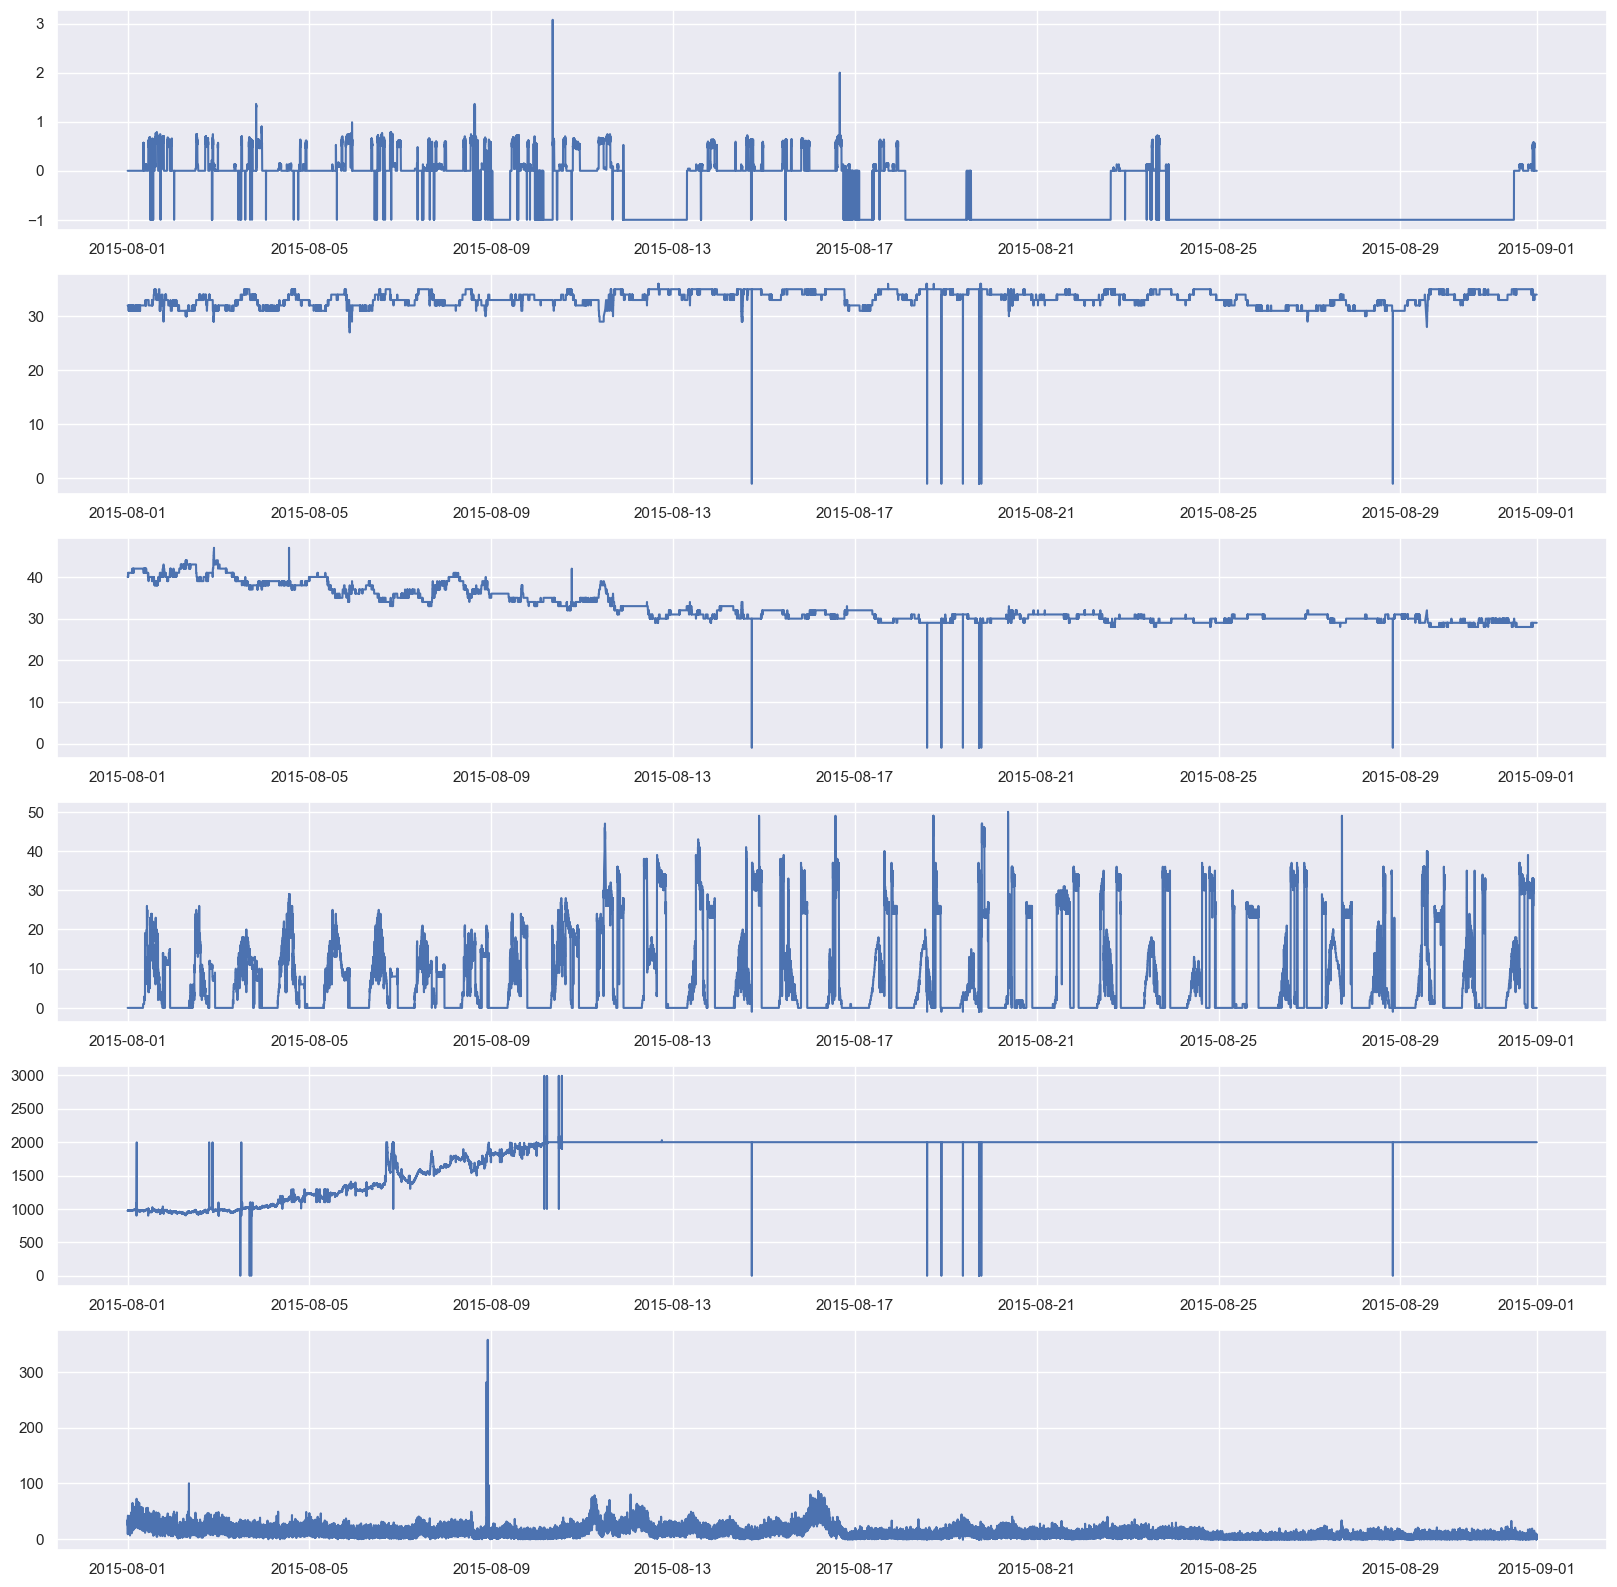

In [110]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize=(20,20))
# fig.suptitle('Vertically stacked subplots')
ax1.plot(sensor_data.index, sensor_data['power'])
ax2.plot(sensor_data.index, sensor_data['temp'])
ax3.plot(sensor_data.index, sensor_data['humidity'])
ax4.plot(sensor_data.index, sensor_data['light'])
ax5.plot(sensor_data.index, sensor_data['CO2'])
ax6.plot(sensor_data.index, sensor_data['dust'])
plt.show()

### Média móvel

In [103]:
sensor_data['dust'].head(10)

time
2015-08-01 00:00:28    27.80
2015-08-01 00:00:58    27.09
2015-08-01 00:01:28    34.50
2015-08-01 00:01:58    28.43
2015-08-01 00:02:28    27.58
2015-08-01 00:02:59    29.35
2015-08-01 00:03:29    26.46
2015-08-01 00:03:59    23.35
2015-08-01 00:04:29    11.67
2015-08-01 00:04:59     9.06
Name: dust, dtype: float64

In [106]:
sensor_data['dust'].head(10).rolling(2).mean()

time
2015-08-01 00:00:28       NaN
2015-08-01 00:00:58    27.445
2015-08-01 00:01:28    30.795
2015-08-01 00:01:58    31.465
2015-08-01 00:02:28    28.005
2015-08-01 00:02:59    28.465
2015-08-01 00:03:29    27.905
2015-08-01 00:03:59    24.905
2015-08-01 00:04:29    17.510
2015-08-01 00:04:59    10.365
Name: dust, dtype: float64

<AxesSubplot: xlabel='time'>

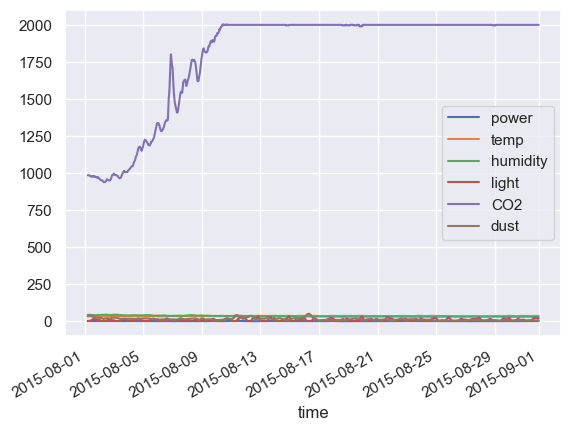

In [111]:
sensor_data.rolling(600).mean().plot()

<AxesSubplot: xlabel='time'>

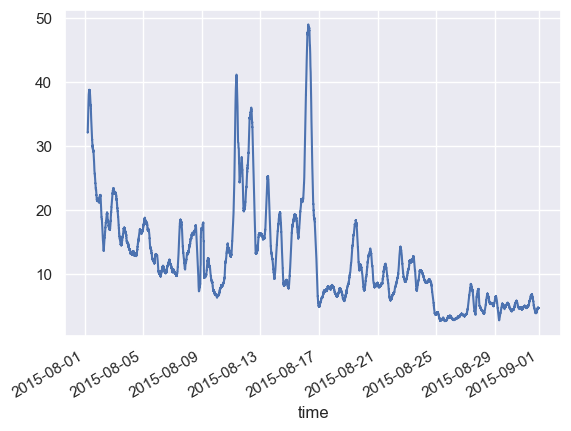

In [115]:
sensor_data.dust.rolling(600).mean().plot()

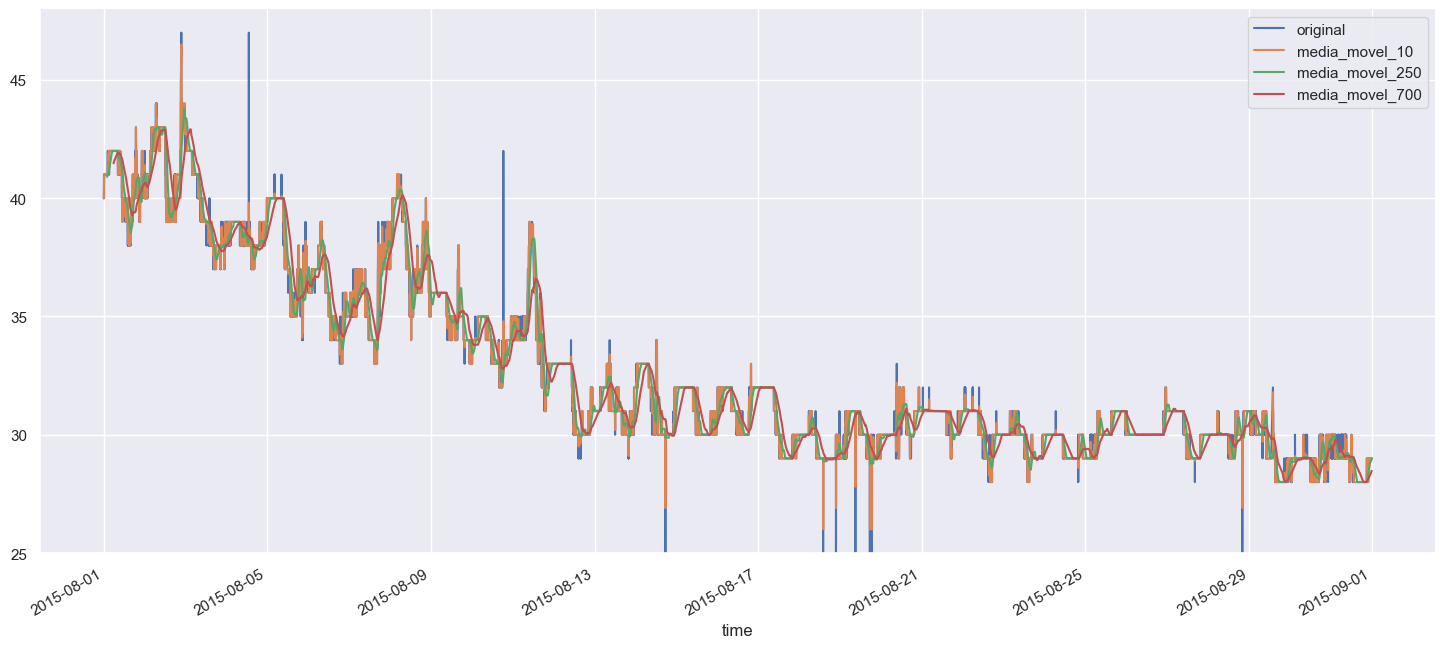

In [120]:
plt.figure(figsize=(18,8))
sensor_data.humidity.plot(label='original')
sensor_data.humidity.rolling(10).mean().plot(label='media_movel_10')
sensor_data.humidity.rolling(250).mean().plot(label='media_movel_250')
sensor_data.humidity.rolling(700).mean().plot(label='media_movel_700')
plt.legend()
plt.ylim(25, 48)
sns.despine()

### Redução da amostra (*Downsampling*)

In [121]:
sensor_data.head(300)

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:28,0.0,32,40,0,973,27.80
2015-08-01 00:00:58,0.0,32,40,0,973,27.09
2015-08-01 00:01:28,0.0,32,40,0,973,34.50
2015-08-01 00:01:58,0.0,32,40,0,973,28.43
2015-08-01 00:02:28,0.0,32,40,0,973,27.58
...,...,...,...,...,...,...
2015-08-01 02:28:31,0.0,32,41,0,980,40.67
2015-08-01 02:29:01,0.0,31,41,0,980,34.39
2015-08-01 02:29:31,0.0,32,41,0,983,31.39


In [123]:
sensor_data.resample('60min', closed='right').mean()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:00,0.000000,31.554622,40.798319,0.000000,975.504202,26.522521
2015-08-01 01:00:00,0.000000,31.316667,41.000000,0.000000,976.283333,25.788417
2015-08-01 02:00:00,0.000000,31.571429,41.218487,0.000000,981.184874,33.728655
2015-08-01 03:00:00,0.000000,31.100000,41.933333,0.000000,986.141667,35.082833
2015-08-01 04:00:00,0.000000,31.806723,42.000000,0.000000,1003.445378,39.323950
...,...,...,...,...,...,...
2015-08-31 19:00:00,0.038133,35.000000,28.000000,25.250000,2000.000000,4.120667
2015-08-31 20:00:00,0.086891,34.983193,28.016807,29.546218,2000.000000,4.957815
2015-08-31 21:00:00,0.142817,34.216667,28.783333,29.083333,2000.000000,5.658333


### Aumento da amostra (*Upsampling*)

In [124]:
sensor_data.head(10)

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:28,0.0,32,40,0,973,27.80
2015-08-01 00:00:58,0.0,32,40,0,973,27.09
2015-08-01 00:01:28,0.0,32,40,0,973,34.50
2015-08-01 00:01:58,0.0,32,40,0,973,28.43
2015-08-01 00:02:28,0.0,32,40,0,973,27.58
2015-08-01 00:02:59,0.0,32,40,0,971,29.35
2015-08-01 00:03:29,0.0,32,40,0,971,26.46
2015-08-01 00:03:59,0.0,32,40,0,971,23.35
2015-08-01 00:04:29,0.0,32,40,0,973,11.67


In [125]:
sensor_data.head(10).resample('10s').mean()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:40,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:50,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:10,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:20,0.0,32.0,40.0,0.0,973.0,34.50
2015-08-01 00:01:30,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:40,NaN,NaN,NaN,NaN,NaN,NaN


#### Usando `.bfill()`

In [126]:
sensor_data.head(10).resample('10s').bfill()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,0.0,32,40,0,973,27.80
2015-08-01 00:00:30,0.0,32,40,0,973,27.09
2015-08-01 00:00:40,0.0,32,40,0,973,27.09
2015-08-01 00:00:50,0.0,32,40,0,973,27.09
2015-08-01 00:01:00,0.0,32,40,0,973,34.50
2015-08-01 00:01:10,0.0,32,40,0,973,34.50
2015-08-01 00:01:20,0.0,32,40,0,973,34.50
2015-08-01 00:01:30,0.0,32,40,0,973,28.43
2015-08-01 00:01:40,0.0,32,40,0,973,28.43


#### Usando `.ffill()`

In [127]:
sensor_data.head(10).resample('10s').ffill()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:30,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:00:40,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:00:50,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:01:00,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:10,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:20,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:30,0.0,32.0,40.0,0.0,973.0,34.50
2015-08-01 00:01:40,0.0,32.0,40.0,0.0,973.0,34.50


In [128]:
a = sensor_data.head(10).resample('10s')

In [129]:
a.mean()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,0.0,32.0,40.0,0.0,973.0,27.80
2015-08-01 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:40,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:00:50,0.0,32.0,40.0,0.0,973.0,27.09
2015-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:10,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:20,0.0,32.0,40.0,0.0,973.0,34.50
2015-08-01 00:01:30,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01 00:01:40,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
sensor_data.head(10).resample('10s').bfill(limit=1).interpolate()

,power,temp,humidity,light,CO2,dust
time,,,,,,
2015-08-01 00:00:20,0.0,32.0,40.0,0.0,973.000000,27.800000
2015-08-01 00:00:30,0.0,32.0,40.0,0.0,973.000000,27.563333
2015-08-01 00:00:40,0.0,32.0,40.0,0.0,973.000000,27.326667
2015-08-01 00:00:50,0.0,32.0,40.0,0.0,973.000000,27.090000
2015-08-01 00:01:00,0.0,32.0,40.0,0.0,973.000000,29.560000
2015-08-01 00:01:10,0.0,32.0,40.0,0.0,973.000000,32.030000
2015-08-01 00:01:20,0.0,32.0,40.0,0.0,973.000000,34.500000
2015-08-01 00:01:30,0.0,32.0,40.0,0.0,973.000000,32.476667
2015-08-01 00:01:40,0.0,32.0,40.0,0.0,973.000000,30.453333


### Shift no dados

In [131]:
sensor_data['dust_1'] = sensor_data.dust.shift(+1)

In [132]:
sensor_data[['dust','dust_1']].head(15)

,dust,dust_1
time,,
2015-08-01 00:00:28,27.80,NaN
2015-08-01 00:00:58,27.09,27.80
2015-08-01 00:01:28,34.50,27.09
2015-08-01 00:01:58,28.43,34.50
2015-08-01 00:02:28,27.58,28.43
2015-08-01 00:02:59,29.35,27.58
2015-08-01 00:03:29,26.46,29.35
2015-08-01 00:03:59,23.35,26.46
2015-08-01 00:04:29,11.67,23.35
